## Train Service

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

In [2]:
df= pd.read_csv("train.csv")

In [7]:
df.drop('Unnamed: 0',axis=1)


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.700000,-0.350000,-0.600000,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.700000,-0.118750,-0.125000,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.000000,-0.466667,-0.800000,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.800000,-0.369697,-0.600000,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.000000,-0.220192,-0.500000,-0.050000,0.454545,0.136364,0.045455,0.136364,505
5,http://mashable.com/2013/01/07/beewi-smart-toys/,731.0,10.0,370.0,0.559889,1.0,0.698198,2.0,2.0,0.0,...,0.136364,0.600000,-0.195000,-0.400000,-0.100000,0.642857,0.214286,0.142857,0.214286,855
6,http://mashable.com/2013/01/07/bodymedia-armba...,731.0,8.0,960.0,0.418163,1.0,0.549834,21.0,20.0,20.0,...,0.100000,1.000000,-0.224479,-0.500000,-0.050000,0.000000,0.000000,0.500000,0.000000,556
7,http://mashable.com/2013/01/07/canon-poweshot-n/,731.0,12.0,989.0,0.433574,1.0,0.572108,20.0,20.0,20.0,...,0.100000,1.000000,-0.242778,-0.500000,-0.050000,1.000000,0.500000,0.500000,0.500000,891
8,http://mashable.com/2013/01/07/car-of-the-futu...,731.0,11.0,97.0,0.670103,1.0,0.836735,2.0,0.0,0.0,...,0.400000,0.800000,-0.125000,-0.125000,-0.125000,0.125000,0.000000,0.375000,0.000000,3600
9,http://mashable.com/2013/01/07/chuck-hagel-web...,731.0,10.0,231.0,0.636364,1.0,0.797101,4.0,1.0,1.0,...,0.100000,0.500000,-0.238095,-0.500000,-0.100000,0.000000,0.000000,0.500000,0.000000,710


In [18]:
X_train=df.iloc[:,0:-1].values
y_train= df.iloc[:,-1].values

Distribution of the target:

In [24]:
y_train_norm = y_train / np.linalg.norm(y_train)

In [41]:
from sklearn import preprocessing
normalized_y = preprocessing.normalize([y_train])

In [51]:
normalized_y=np.asarray(normalized_y[0])


(array([2.4749e+04, 1.2000e+01, 1.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([4.54172443e-07, 7.66010876e-02, 1.53201721e-01, 2.29802354e-01,
        3.06402988e-01, 3.83003621e-01]),
 <a list of 5 Patch objects>)

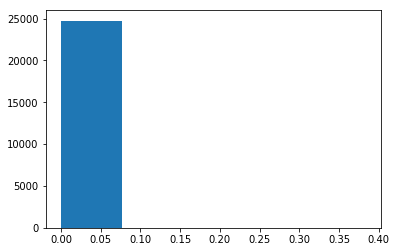

In [53]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.hist(normalized_y, 5)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a177f91d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a177f9860>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a177f9080>],
 'medians': [<matplotlib.lines.Line2D at 0x1a177f9ef0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a177fc278>],
 'means': []}

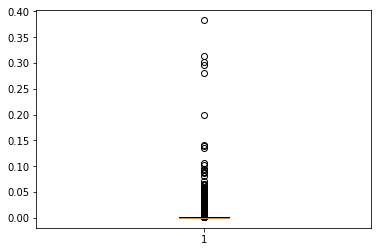

In [54]:
plt.boxplot(normalized_y)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a178ddba8>,
 'caps': [<matplotlib.lines.Line2D at 0x1a178de278>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a178dda58>],
 'medians': [<matplotlib.lines.Line2D at 0x1a178de908>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a178dec50>],
 'means': []}

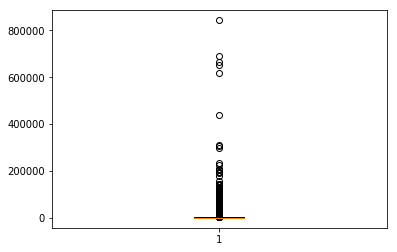

In [62]:
plt.boxplot(y_train)

In [60]:
normalized_y_0=normalized_y[normalized_y>0.2]
normalized_y_1=normalized_y[normalized_y<=0.2]

In [59]:
normalized_y_0.shape

(6,)

In [63]:
y_train_outlier=y_train[y_train>400000]

In [64]:
y_train_outlier.shape

(6,)

In [65]:
y_train_outlier=y_train[y_train>200000]
y_train_outlier.shape

(14,)

In [72]:
y_train_outlier=y_train[y_train>50000]
print("percentage:",y_train_outlier.shape[0]/len(y_train))

percentage: 0.005410425162514636


In [71]:
y_train_outlier=y_train[y_train>5000]
print("percentage:",y_train_outlier.shape[0]/len(y_train))

percentage: 0.1365930471999031


Detect the outliers:IQR

In [73]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


Unnamed: 0                        1.238300e+04
 timedelta                        2.530000e+02
 n_tokens_title                   2.000000e+00
 n_tokens_content                 4.470000e+02
 n_unique_tokens                  1.405493e-01
 n_non_stop_words                 4.410000e-09
 n_non_stop_unique_tokens         1.300046e-01
 num_hrefs                        9.000000e+00
 num_self_hrefs                   3.000000e+00
 num_imgs                         4.000000e+00
 num_videos                       1.000000e+00
 average_token_length             3.599758e-01
 num_keywords                     3.000000e+00
 data_channel_is_lifestyle        0.000000e+00
 data_channel_is_entertainment    0.000000e+00
 data_channel_is_bus              0.000000e+00
 data_channel_is_socmed           0.000000e+00
 data_channel_is_tech             0.000000e+00
 data_channel_is_world            0.000000e+00
 kw_min_min                       5.000000e+00
 kw_max_min                       6.450000e+02
 kw_avg_min  

In [83]:
IQR=np.asarray(IQR)

In [87]:
Q1=np.asarray(Q1)
Q3=np.asarray(Q3)

In [92]:
Q1[-1]-1.5*IQR[-1]

-1972.5

In [93]:
Q3[-1]+1.5*IQR[-1]

5823.5

In [100]:
y_temp=np.array(df[' shares'][df[' shares'].between(Q1[-1]-1.5*IQR[-1],Q3[-1]+1.5*IQR[-1], inclusive =False)])

(array([8944., 8049., 2560., 1486.,  885.]),
 array([1.0000e+00, 1.1608e+03, 2.3206e+03, 3.4804e+03, 4.6402e+03,
        5.8000e+03]),
 <a list of 5 Patch objects>)

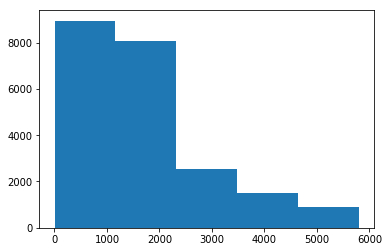

In [111]:
plt.hist(y_temp,5)

## Define the 6 levels of popularity


In [113]:
df['pop_level']=df[' shares']

In [127]:

df['pop_level'].loc[df[' shares'].between(0,1000)] = 0
df['pop_level'].loc[df[' shares'].between(1001,2000)] = 1
df['pop_level'].loc[df[' shares'].between(2000,3000,inclusive=False)] = 2
df['pop_level'].loc[df[' shares'].between(3000,4000)] = 3
df['pop_level'].loc[df[' shares'].between(4000,5000,inclusive=False)] = 4
df['pop_level'].loc[df[' shares']>=5000] = 5






/Users/xinxinhuang/anaconda2/envs/python37/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [128]:
df['pop_level'].unique()

array([0, 1, 3, 2, 5, 4])

## Train model: Random forest

In [129]:
import warnings
warnings.filterwarnings('ignore')
df.drop(' shares',axis=1)
X_train= df.loc[:,df.columns != 'pop_level']
y_train=df['pop_level']


In [131]:
X_train.dtypes == "object"
categorical = X_train.dtypes == "object"
numerical = X_train.dtypes != "object"

In [136]:
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
preprocess = make_column_transformer(
    (StandardScaler(), numerical),
    (OneHotEncoder(handle_unknown='ignore',
                   sparse=False), categorical))

In [137]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

model_rf = make_pipeline(preprocess, RandomForestClassifier(random_state=42,n_estimators=20))

param_grid_rf = {"randomforestclassifier__max_features": np.asarray(['sqrt', 'log2']),
                'randomforestclassifier__n_estimators': [200,500],
                'randomforestclassifier__max_depth':[3,6]}

grid_model_rf = GridSearchCV(model_rf, param_grid=param_grid_rf, cv=5,n_jobs=-1, 
                             scoring=['accuracy','f1_macro','f1_micro','f1_weighted'], 
                             refit='accuracy')
grid_model_rf.fit(X_train, y_train)



GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('columntransformer', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True), Unnamed: 0                         True
url                      ...mators=20, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'randomforestclassifier__max_features': array(['sqrt', 'log2'], dtype='<U4'), 'randomforestclassifier__n_estimators': [200, 500], 'randomforestclassifier__max_depth': [3, 6]},
       pre_dispatch='2*n_jobs', refit='accuracy',
       return_train_score='warn',
       scoring=['accuracy', 'f1_macro', 'f1_micro', 'f1_weighted'],
       verbose=0)

In [138]:
print("Best parameter for Random Forest:",
      grid_model_rf.best_params_)
print("Best accuracy: ",grid_model_rf.best_score_)

Best parameter for Random Forest: {'randomforestclassifier__max_depth': 6, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__n_estimators': 500}
Best accuracy:  0.5384584325917552


In [139]:
grid_model_rf.cv_results_

{'mean_fit_time': array([ 109.41169858,  169.80601315,   24.49156389,   35.39871373,
         570.68797216, 1141.00319395,   29.04127216,   44.26024008]),
 'std_fit_time': array([   6.47297724,   36.39129746,    1.59171683,    1.95376708,
         899.92189831, 1035.90454725,    4.01877766,    2.83596994]),
 'mean_score_time': array([11.36455379, 11.7672544 ,  9.69527264, 14.0640008 , 52.96397901,
        14.95694814, 12.64034815, 13.20484982]),
 'std_score_time': array([ 3.53111983,  2.58289201,  0.80713313,  0.89317916, 76.18605929,
         1.06725478,  0.90048141,  2.48083554]),
 'param_randomforestclassifier__max_depth': masked_array(data=[3, 3, 3, 3, 6, 6, 6, 6],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_randomforestclassifier__max_features': masked_array(data=['sqrt', 'sqrt', 'log2', 'log2', 'sqrt', 'sqrt', 'log2',
                    'log2'],
              mask=[False, False, False, F

In [142]:
# Utility function to report best scores
def report_scores(results):
    for i in range(4):
        models = np.flatnonzero(results['rank_test_accuracy'] == i)
        for model in models:
            print("Model {0}".format(i))
            print("Mean validation score: accuracy : {0:.3f} ".format(
                  results['mean_test_accuracy'][model]))
            print("Mean validation score: f1_macro : {0:.3f} ".format(
                  results['mean_test_f1_macro'][model]))
            print("Mean validation score: f1_micro : {0:.3f}".format(
                  results['mean_test_f1_micro'][model]))
            print("Mean validation score: f1_weighted : {0:.3f} ".format(
                  results['mean_test_f1_weighted'][model]))
            
            print("Parameters: {0}".format(results['params'][model]))
            print("")
        

In [143]:
report_scores(grid_model_rf.cv_results_)

Model 1
Mean validation score: accuracy : 0.538 
Mean validation score: f1_macro : 0.219 
Mean validation score: f1_micro : 0.538
Mean validation score: f1_weighted : 0.418 
Parameters: {'randomforestclassifier__max_depth': 6, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__n_estimators': 500}

Model 2
Mean validation score: accuracy : 0.533 
Mean validation score: f1_macro : 0.217 
Mean validation score: f1_micro : 0.533
Mean validation score: f1_weighted : 0.414 
Parameters: {'randomforestclassifier__max_depth': 6, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__n_estimators': 200}

Model 3
Mean validation score: accuracy : 0.457 
Mean validation score: f1_macro : 0.175 
Mean validation score: f1_micro : 0.457
Mean validation score: f1_weighted : 0.337 
Parameters: {'randomforestclassifier__max_depth': 3, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__n_estimators': 500}



## Save model

In [145]:
import pickle
model_rf_2 = make_pipeline(preprocess, RandomForestClassifier(max_depth=6, 
                                                              max_features='sqrt',
                                                              n_estimators=500,
                                                              random_state=42))

model_rf_2.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('columntransformer', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True), Unnamed: 0                         True
url                      ...ators=500, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False))])

In [147]:
from joblib import dump, load
dump(model_rf_2, 'ModelRF.joblib')


['ModelRF.joblib']

In [148]:
#Load model: load('ModelRF.joblib')